### Elliptic Envelope Outlier Detection
The intuition behind the Elliptic Envelope is very simple. We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as an inlier (green ones) and any observation outside the ellipse as an outlier (red ones).

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope 

In [8]:
X,_=make_blobs(n_samples=300,n_features=2,centers=1,shuffle=True,random_state=1)

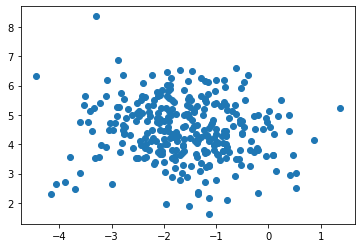

In [9]:
plt.scatter(X[:,0],X[:,1])

In [11]:
elp=EllipticEnvelope(contamination=0.025,random_state=1)

In [10]:
help(EllipticEnvelope)

Help on class EllipticEnvelope in module sklearn.covariance._elliptic_envelope:

class EllipticEnvelope(sklearn.base.OutlierMixin, sklearn.covariance._robust_covariance.MinCovDet)
 |  EllipticEnvelope(*, store_precision=True, assume_centered=False, support_fraction=None, contamination=0.1, random_state=None)
 |  
 |  An object for detecting outliers in a Gaussian distributed dataset.
 |  
 |  Read more in the :ref:`User Guide <outlier_detection>`.
 |  
 |  Parameters
 |  ----------
 |  store_precision : bool, default=True
 |      Specify if the estimated precision is stored.
 |  
 |  assume_centered : bool, default=False
 |      If True, the support of robust location and covariance estimates
 |      is computed, and a covariance estimate is recomputed from it,
 |      without centering the data.
 |      Useful to work with data whose mean is significantly equal to
 |      zero but is not exactly zero.
 |      If False, the robust location and covariance are directly computed
 |      w

In [12]:
pred=elp.fit_predict(X)
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [13]:
outlier_index=np.where(pred==-1)
outlier_values=X[outlier_index]

Text(0.5, 1.0, 'Elliptic Evelope Outlier Detection')

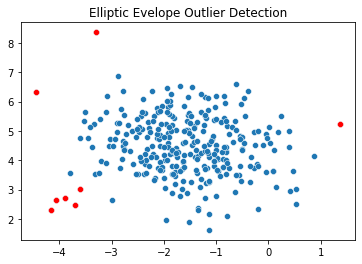

In [15]:
sns.scatterplot(x=X[:,0],y=X[:,1])
sns.scatterplot(x=outlier_values[:,0],y=outlier_values[:,1],color='r')
plt.title("Elliptic Evelope Outlier Detection")

When we want to detect outliers of X (training dataset) using the Scikit-learn EllipticEnvelope() function, we can call either the fit_predict(X) method once or fit(X) and predict(X) methods separately. Both ways give the same results.

### Elliptic Evelope Novelty Detection

In [16]:
new_obs=np.array([[-3,9.6]])

In [17]:
elp=EllipticEnvelope(contamination=0.025,random_state=1)
elp.fit(X)

EllipticEnvelope(contamination=0.025, random_state=1)

In [18]:
pred=elp.predict(new_obs)

In [19]:
pred

array([-1])

In [23]:
outlier_index=np.where(pred==-1)
outlier_values=new_obs[outlier_index]
outlier_values

array([[-3. ,  9.6]])

Text(0.5, 1.0, 'Elliptic Evelope Novelty Detection')

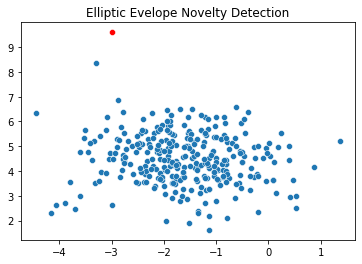

In [25]:
sns.scatterplot(x=X[:,0],y=X[:,1])
sns.scatterplot(x=outlier_values[:,0],y=outlier_values[:,1],color='r')
plt.title("Elliptic Evelope Novelty Detection")

### Elliptic Envelope on housing data

In [27]:
df=pd.read_csv("../Data/housing.csv")

In [28]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [30]:
x=df.drop(columns=["MEDV"])
y=df["MEDV"]

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [41]:
elpenv=EllipticEnvelope(contamination=0.025,random_state=1)

In [42]:
yhat=elpenv.fit_predict(xtrain)

In [43]:
mask=yhat!=-1

In [44]:
xtrain=xtrain[mask]

In [45]:
xtrain

,RM,LSTAT,PTRATIO
403,6.411,15.02,20.2
160,6.250,5.50,14.7
453,6.167,16.29,20.2
49,5.602,16.20,17.9
306,5.782,15.94,18.4
...,...,...,...
323,6.310,6.75,20.2
192,7.274,6.62,12.6
117,6.021,10.30,17.8
47,6.030,18.80,17.9


In [46]:
ytrain=ytrain[mask]

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [48]:
ypred=model.predict(xtest)

In [50]:
model.score(xtest,ytest)

0.6919747732735451

### Isolation Forest Algorithm
Isolation forest is a tree-based algorithm that is very effective for both outlier and novelty detection in high-dimensional data.

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [51]:
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
data=load_iris()
X=data.data

In [67]:
isoforest=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.05,max_features=1,random_state=1,bootstrap=False,n_jobs=-1)

In [75]:
pred=isoforest.fit_predict(X)

In [76]:
outlier_index=np.where(pred==-1)
outlier_values=X[outlier_index]

In [77]:
sc=StandardScaler()
x_scaled=sc.fit_transform(X)
outlier_values_scaled=sc.transform(outlier_values)

In [78]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
outlier_values_pca=pca.transform(outlier_values_scaled)

In [79]:
outlier_index

(array([ 13,  22,  41,  60, 109, 117, 118, 131], dtype=int64),)

Text(0.5, 1.0, 'Isolation Forest Outlier Detection')

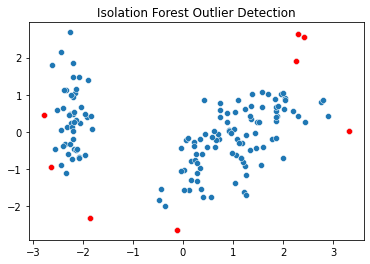

In [81]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1])
sns.scatterplot(x=outlier_values_pca[:,0],y=outlier_values_pca[:,1],color='r')
plt.title("Isolation Forest Outlier Detection")

### One-Class SVM algorithm 
One-class SVM (One-class Support Vector Machines) is an unsupervised machine learning algorithm that can be used for novelty detection. It is very sensitive to outliers. Therefore, it is not very good for outlier detection, but the best option for novelty detection when the training data is not much polluted with outliers. This algorithm can be applied to high-dimensional data sets and there is no underlying assumption in the distribution of the data.

One-class SVM is based on SVM. An SVM uses a hyperplane to separate two classes while a One-class SVM uses a hypersphere to encompass all of the observations.

In [82]:
from sklearn.svm import OneClassSVM

In [83]:
X,_=make_blobs(n_samples=300,n_features=2,centers=1,shuffle=True,random_state=1)

In [85]:
one_class_svm=OneClassSVM(kernel='rbf',degree=3,gamma='scale')

In [84]:
help(OneClassSVM)

Help on class OneClassSVM in module sklearn.svm._classes:

class OneClassSVM(sklearn.base.OutlierMixin, sklearn.svm._base.BaseLibSVM)
 |  OneClassSVM(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, nu=0.5, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Unsupervised Outlier Detection.
 |  
 |  Estimate the support of a high-dimensional distribution.
 |  
 |  The implementation is based on libsvm.
 |  
 |  Read more in the :ref:`User Guide <outlier_detection>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be used. If a callable is given it is
 |       used to precompute the kernel matrix.
 |  
 |  degree : int, default=3
 |      Degree of the polynomial kernel function ('poly').
 | 

In [86]:
new_data=np.array([[-3,9.6]])

In [87]:
one_class_svm.fit(X)

OneClassSVM()

In [88]:
pred=one_class_svm.predict(new_data)

In [89]:
outlier_index=np.where(pred==-1)
outlier_values=new_data[outlier_index]

Text(0.5, 1.0, 'One class SVM Novelty Detection')

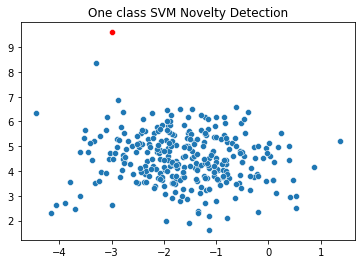

In [90]:
sns.scatterplot(x=X[:,0],y=X[:,1])
sns.scatterplot(x=outlier_values[:,0],y=outlier_values[:,1],color='r')
plt.title("One class SVM Novelty Detection")

### Local Outlier Factor 
Local Outlier Factor (LOF) is an unsupervised machine learning algorithm that was originally created for outlier detection, but now it can also be used for novelty detection. It works well on high-dimensional datasets.

The Local Outlier Factor (LOF) algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbours. It considers as outliers the samples that have a substantially lower density than their neighbours.

In [91]:
from sklearn.neighbors import LocalOutlierFactor

In [93]:
lof=LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski',contamination=0.05,novelty=False,n_jobs=-1)

In [92]:
help(LocalOutlierFactor)

Help on class LocalOutlierFactor in module sklearn.neighbors._lof:

class LocalOutlierFactor(sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.UnsupervisedMixin, sklearn.base.OutlierMixin, sklearn.neighbors._base.NeighborsBase)
 |  LocalOutlierFactor(n_neighbors=20, *, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination='auto', novelty=False, n_jobs=None)
 |  
 |  Unsupervised Outlier Detection using Local Outlier Factor (LOF)
 |  
 |  The anomaly score of each sample is called Local Outlier Factor.
 |  It measures the local deviation of density of a given sample with
 |  respect to its neighbors.
 |  It is local in that the anomaly score depends on how isolated the object
 |  is with respect to the surrounding neighborhood.
 |  More precisely, locality is given by k-nearest neighbors, whose distance
 |  is used to estimate the local density.
 |  By comparing the local density of a sample to the local densities of
 |  its neighbors,

In [94]:
pred=lof.fit_predict(X)

In [95]:
#extract outliers
outlier_index=np.where(pred==-1)
outlier_values=X[outlier_index]

Text(0.5, 1.0, 'Local Outlier Factor- Outlier Detection')

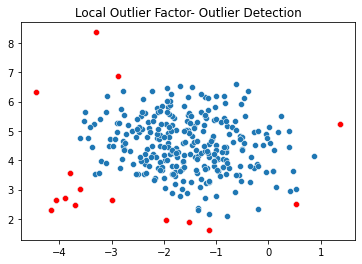

In [97]:
sns.scatterplot(x=X[:,0],y=X[:,1])
sns.scatterplot(x=outlier_values[:,0],y=outlier_values[:,1],color='r')
plt.title("Local Outlier Factor- Outlier Detection")

### Local Outlier Factor - Novelty Detection

In novelty detection

If you want to use the Local Outlier Factor for novelty detection (i.e. finding whether a new unseen observation is an outlier or not), you should set the novelty hyperparameter to True (the default is False). When applying this technique for novelty detection, the fit() and predict() methods are available. The fit() method should be used with the training data (X) and the predict() method should be used on new unseen data, not on the training data (X).

In [98]:
lof=LocalOutlierFactor(n_neighbors=20,algorithm='auto',metric='minkowski',contamination=0.05,novelty=True,n_jobs=-1)

In [99]:
new_data=np.array([[-3,8.6]])

In [100]:
lof.fit(X)

LocalOutlierFactor(contamination=0.05, n_jobs=-1, novelty=True)

In [101]:
pred=lof.predict(new_data)

In [102]:
outlier_index=np.where(pred==-1)
outlier_values=new_data[outlier_index]

Text(0.5, 1.0, 'Local Outlier Factor- Novelty Detection')

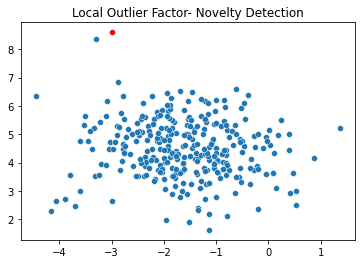

In [103]:
sns.scatterplot(x=X[:,0],y=X[:,1])
sns.scatterplot(x=outlier_values[:,0],y=outlier_values[:,1],color='r')
plt.title("Local Outlier Factor- Novelty Detection")

The Isolation Forest and LOF work well on high-dimensional data. For the purpose of visualization, we can apply the Principal Component Analysis to reduce the dimensionality of high-dimensional data.

The Elliptic Envelope should only be used with data that satisfy the assumption of normality.

The One-class SVM is not very good for outlier detection, but the best option for novelty detection when the training data is not much polluted with outliers.

The most important hyperparameter in the Elliptic Envelope, Isolation Forest and LOF is the contamination hyperparameter. It represents the proportion of outliers in the dataset. In most cases, we do not know the exact value for the contamination hyperparameter. 